## Introduction





### Import libraries


In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

%matplotlib inline

We imported a new module from the sickit-learn library, which is Kmeans.
This module is used for K-means clustering, which is an algorithm that partitions data into clusters based on similarity.

# Customer Segmentation with K-Means
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.



### Load Data From CSV File  
Before you can work with the data, you must use the URL to get the Cust_Segmentation.csv.

In [2]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing

As you can see, __Address__ in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [3]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __standardScaler()__ to normalize our dataset.

In [4]:
from sklearn.preprocessing import StandardScaler

We import the StandardScaler class from the preprocessing module of the scikit-learn library. 
- The StandardScaler class is used for standardizing features by removing the mean and scaling to unit variance.

In [5]:
X = df.values[:,1:]

- X = df.values[:,1:]: We extracted the values from the dataframe df.
- df.values : returns a numpy array containing all the values in the DataFrame.
- [:,1:] : we select all rows (:) and all columns starting from the second column (1:) (We consider that the first column contains the target variable 'customer id' and the remaining columns contain the features).

In [6]:
X = np.nan_to_num(X)

We used the nan_to_num() function to replace any nan values in the array with 0.

In [7]:
Clus_dataSet = StandardScaler().fit_transform(X)

We standardized the data using the StandardScaler object that we created earlier. Then, we fit the scaler to the data (X) and then transforms the data in one step. 
- This calculates the mean and standard deviation of each feature in X, and then standardizes each feature by subtracting the mean and dividing by the standard deviation.

In [8]:
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

We visualize the standarized data

Aim/ Goal of this process: To prepare the data for modeling by ensuring that all features have the same scale.

### Modeling

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.

In [9]:
from sklearn.cluster import KMeans

Import the kmeans class from the sklearn.cluster module.

In [10]:
clusterNum = 3

Set the variable to the desired number of clusters. In this case, we set the number to 3, indicating that we want the algorithm to identify three clusters in the data.

In [11]:
k_means= KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)

We created an instance of th Kmeans class , and we defined many parameters.
- init="k-means++": This parameter specifies the method used to initialize the centroids. "k-means++" is a smart initialization method that selects initial cluster centers in a way that speeds up convergence.
- key weaknesses of the standard k-means algorithm : the sensitivity to the initial placement of centroids.
- K-means++ aims to select initial centroids in a more intelligent way.
- Process of Kmeans ++ :
    -   The first centroid is randomly selected from the data points. This is similar to the random initialization used in the standard k-means algorithm.
    -   After the first centroid is chosen, subsequent centroids are selected iteratively. The probability of each data point being chosen as the next centroid is proportional to its squared distance from the nearest existing centroid. This means that data points that are farther away from existing centroids have a higher probability of being chosen as the next centroid.
    -   This approach encourages the centroids to be well spread out across the dataset, leading to more representative initial cluster centers.
- n_clusters: This parameter sets the number of clusters to be identified.
- n_init=12: This parameter specifies the number of times the k-means algorithm will be run with different centroid seeds. The final results will be based on the best run in terms of inertia (sum of squared distances from each point to its assigned center).

In [12]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

In [13]:
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

### Insights
We assign the labels to each row in dataframe.

In [14]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster.

In [15]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


Now, lets look at the distribution of customers based on their age and income:

In [16]:
area = np.pi * ( X[:, 1])**2  

- area : a variable where we calculate the marker sizes for the scatter plot. It computes the area of each marker based on the values in the second column (X[:, 1]) of the data array X.
- The formula for the area of a circle is pi * r^2, where r is the radius. Here, we square the values in the second column to get the radius squared, and then multiply by pi to get the area.

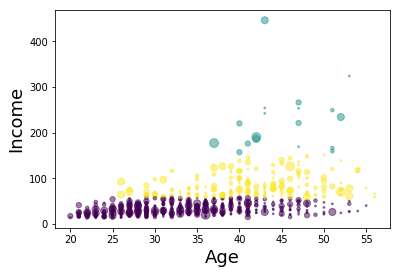

In [17]:
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=18)
plt.show()

- X[:, 0] represents the values of the first column of the data array X, which typically corresponds to the x-axis values (Age).
- X[:, 3] represents the values of the fourth column of X, which typically corresponds to the y-axis values (Income).
- c=labels.astype(np.float64): assigns colors to the markers based on the cluster labels (labels) obtained from the k-means. labels.astype(np.float64) converts the labels to floating-point numbers for compatibility with the scatter plot function.
- alpha=0.5 sets the transparency of the markers to 0.5, making them partially transparent.

In [18]:
from mpl_toolkits.mplot3d import Axes3D 

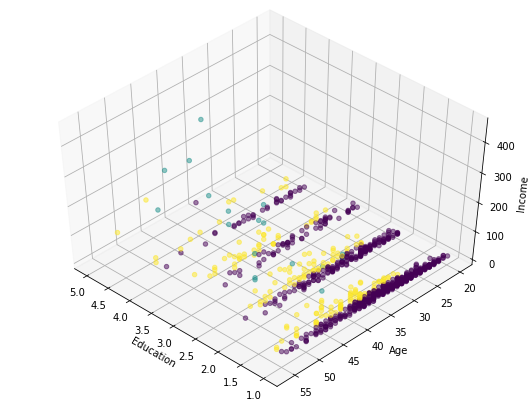

In [19]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0.05, 0.05, 0.9, 0.9], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float64), alpha=0.5)

plt.show()

#### setting value for k

In [20]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

- In this code we set different values for k ranging form 1 to 10
- we also created sse list to store the sum of squared distances for each value of k.

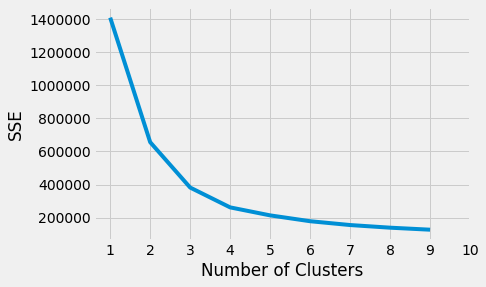

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

We can say that the elbow point here that define the most optimal number of clusters could be 2 because the curve typically decreases rapidly at first and then starts to flatten out.

In [22]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

[0.6857530340991117,
 0.5616660500867684,
 0.4779880648501076,
 0.368470927037114,
 0.34954074975112126,
 0.34515757099467825,
 0.25982677314867003,
 0.2678878628937257]

- Silhouette coefficient is a metric used to evaluate the quality of clusters formed by a clustering algorithm
- Silhouette coefficient is typically calculated for values of k greater than 1.
- Higher silhouette scores indicate better-defined clusters

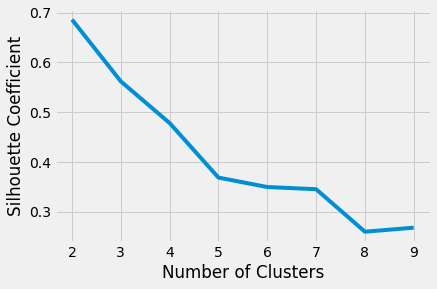

In [23]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

We can confirm another time that the best quality is with 2 clusters because we have the highest silouhette score.